# STATISTICS LEARNING INTERVENTION - CASE STUDY

# Libararies

In [165]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'factorial' from math library
from math import factorial

# import 'stats' package from scipy library
from scipy import stats
from scipy.stats import randint

# import 'random' to generate a random sample
import random

# import statistics to perform statistical computation  
import statistics

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare


# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 


# Section 1

### Question 1

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;">In a library 50 books are selected at random.On an average 1 out of 10 books is a statistics book. .

i) Probability of getting exactly 3 statistics book.

ii) Probability of getting atleast 3 statistics book.

iii) Probability of getting atmost 3 statistics book.

iv) Probability of getting between 3 and 10 statistics book.

v)  pmf and cdf of selecting the statistics book. Plot the graph.



In [3]:
n=50
p=1/10
ri=3
print('i',stats.binom.pmf(ri,n,p))
rii=3
print('ii',stats.binom.sf(rii-1,n,p))
riii=3
print('iii',stats.binom.cdf(riii,n,p))
riv1=3
riv2=10
print('iv',stats.binom.cdf(riv2,n,p)-stats.binom.cdf(riv1-1,n,p))


i 0.13856514960695693
ii 0.8882712436536526
iii 0.2502939059533075
iv 0.8789166420663237


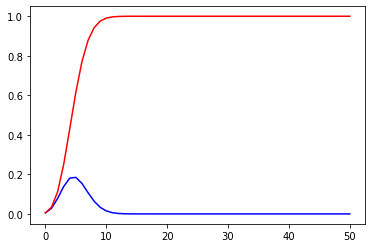

In [13]:
pmf=[]
cdf=[]
for i in range(51):
    pmf.append(stats.binom.pmf(i,n,p))
    cdf.append(stats.binom.cdf(i,n,p))
plt.plot(pmf,color='Blue')
plt.plot(cdf,color='red')

### Question 2

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;">The piston pressure in a randomly selected bike is normally distributed with mean value of 28 psi and standard deviation of 0.7 psi.


What is the probability that the pressure for a randomly selected piston:

(a) between 25 and 29 psi 

(b) less than 30 psi

(c) greater than 30.5 psi  

In [24]:
mu=28
sd=0.7
x1=25
x2=29
z1=(x1-mu)/sd
z2=(x2-mu)/sd
stats.norm.cdf(z2)-stats.norm.cdf(z1)

0.9234271668415907

In [25]:
xb=30
zb=(xb-mu)/sd
stats.norm.cdf(zb)

0.9978626330199137

In [26]:
xc=30.5
zc=(xc-mu)/sd
stats.norm.sf(zc)

0.00017751969037347077

### Question 3

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;">A sample of 400 bulbs manufactued found to have a mean lifetime is 171.38 hrs. Can it
reasonably be regarded as a large population with mean  more than 173 hrs
and standard deviation of 3.3 hrs so that company can make profit(Test at 5% significance level).Will company make profit? Assume data is normally distributed.

In [32]:
xbar=171.38
n=400
mu=173
sigma=3.3
#Assumption:
    #Data Normal
    #Pop-std known
#Hypothesis: Claim is 
    #H0:mu>=173
    #ha:mu<173
#test:
    #One Sample z test - left tail
#zstat
z=xbar-mu/(sigma/(n**0.5))
#pval
pval=stats.norm.cdf(z)
#inference
if pval >= 0.05:
    print('Ho is selected')
else:
    print('Ha is selected')

Ha is selected


In [34]:
#Hypothesis: Claim is 
    #H0:mu<=173
    #ha:mu>173
#test:
    #One Sample z test - right tail
#zstat
z=xbar-mu/(sigma/(n**0.5))
#pval
pval=stats.norm.sf(z)
#inference
if pval >= 0.05:
    print('Ho is selected')
else:
    print('Ha is selected')

Ho is selected


In [ ]:
#The Pop mean is less than 173.
#claim is false

### Question 4

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;">The data of weight loss program is given below.Find whether gender has any effect in weight loss. 




Weight_loss_Male   = [ 3.69, 4.12, 4.65, 3.19,  4.34, 3.68, 4.12, 4.50, 3.70, 3.09,3.65, 4.73, 3.93, 3.46, 3.28, 4.43, 4.13, 3.62, 3.71, 2.92]

Weight_loss_Female = [2.99, 1.80, 3.79, 4.12, 1.76, 3.50, 3.61, 2.32, 3.67, 4.26, 4.57, 3.01, 3.82, 4.33, 3.40, 3.86]

Calculate the test statistic and p value manually and compare with the inbuilt function.
    
**Note: Assume data is normally distributed**

In [27]:
#Data prep
Weight_loss_Male = [ 3.69, 4.12, 4.65, 3.19, 4.34, 3.68, 4.12, 4.50, 3.70, 3.09,3.65, 4.73, 3.93, 3.46, 3.28, 4.43, 4.13, 3.62, 3.71, 2.92]

Weight_loss_Female = [2.99, 1.80, 3.79, 4.12, 1.76, 3.50, 3.61, 2.32, 3.67, 4.26, 4.57, 3.01, 3.82, 4.33, 3.40, 3.86]

#xbar
x1bar=np.mean(Weight_loss_Male)
x2bar=np.mean(Weight_loss_Female)
print(x1bar,x2bar)

#Normality
print(stats.shapiro(Weight_loss_Male))
print(stats.shapiro(Weight_loss_Female))

#pvals are > 0.05

3.847 3.425625
ShapiroResult(statistic=0.966270387172699, pvalue=0.6749979853630066)
ShapiroResult(statistic=0.9086650609970093, pvalue=0.11074579507112503)


In [90]:
#Assumption:
    #Data Normal
    #Pop-std not known
#Hypothesis:
    #H0:mu1 = mu2 
    #Ha:mu1 != mu2
#Test - 2 sample t test - Unpaired - two
#tstat,pval
s1=np.std(Weight_loss_Male,ddof=1)
s2=np.std(Weight_loss_Female,ddof=1)
n1=len(Weight_loss_Male)
n2=len(Weight_loss_Female)
df1=n1-1
df2=n2-1
s12=s1**2
s22=s2**2
num1=(df1*s12)+(df2*s22)
den1=df1+df2
sp2=num1/den1
print('spsqr=>',sp2)
num=(x1_bar-x2_bar)-0
den=np.sqrt(sp2*(1/n1+1/n2))
tstat=num/den
print('t=>',tstat)

pval=stats.t.sf(abs(tstat),df=n1+n2-2) * 2
print('p=>',pval)

if pval >=0.05:
    print('H0')
else:
    print('Ha')


spsqr=> 0.4727356985294119
t=> 1.8271882959812857
p=> 0.07646042053352953
H0


In [72]:
t2,twopval=stats.ttest_ind(Weight_loss_Male,Weight_loss_Female)
onepval=twopval/2
print('t2=>',t2,'2pro=>',twopval)
#inference:
if twopval>=0.05:
    print('H0 is selected')
else:
    print('Ha is selected')

t2=> 1.827188295981286 2pro=> 0.0764604205335295
H0 is selected


In [ ]:
#Does not have any effect on each other

### Question 5

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;"> The data of weight gain program is given below.Find whether the program is effective.

Weight_before =[52, 56, 61, 47, 58, 52, 56, 60, 52, 46, 51, 62, 54, 50, 48, 59, 56, 51, 52, 44, 52, 45, 57, 60, 45]

Weight_after  =[62, 64, 40, 65, 76, 82, 53, 68, 77, 60, 69, 34, 69, 73, 67, 82, 62, 49, 44, 43, 77, 61, 67, 67, 54]

**Note: Assume data is normally distributed and have equal variance.**

In [93]:
#Data prep:
Weight_before =[52, 56, 61, 47, 58, 52, 56, 60, 52, 46, 51, 62, 54, 50, 48, 59, 56, 51, 52, 44, 52, 45, 57, 60, 45]

Weight_after =[62, 64, 40, 65, 76, 82, 53, 68, 77, 60, 69, 34, 69, 73, 67, 82, 62, 49, 44, 43, 77, 61, 67, 67, 54]

#xbar
x1bar=np.mean(Weight_before)
x2bar=np.mean(Weight_after)

#Normality
print(stats.shapiro(Weight_before))
print(stats.shapiro(Weight_after))

#Assumption:
    #Data normal
    #pop-std not known
#Hypothesis:
    #H0: mu1 >= mu2 
    #Ha: mu1 < mu2

#Test: 2 Sample t test - paired - left

#t,pval 
t,two_pval=stats.ttest_rel(Weight_before,Weight_after)
onepval=two_pval/2
print(onepval)
#inference
if  onepval>=0.05:
    print('Ho is selected')
else:
    print('ha is selected')

ShapiroResult(statistic=0.954791784286499, pvalue=0.3205137550830841)
ShapiroResult(statistic=0.949905276298523, pvalue=0.24949611723423004)
0.0011648791840145182
ha is selected


In [ ]:
#Before report is less than After report
#It is effective

# Section 2

## COVID Data Analysis

In [76]:
import pandas as pd
df = pd.read_csv("LI_STAT_NOV.csv")
df.head()

,Patient_id,Oxy_level,Pulse_rate,Blood_Sugar,Age,Sex,Old_1,Old_2,Old_3,New_1,New_2,New_3
0,COVPAT0001,97.109182,109.156925,83,5,M,30.08,23.14,33.58,30.51,28.75,22.47
1,COVPAT0002,98.039265,109.481086,119,3,M,18.38,28.86,38.32,21.66,28.53,16.05
2,COVPAT0003,97.904030,110.428601,80,8,F,30.27,24.32,42.16,21.99,31.26,20.15
3,COVPAT0004,99.212383,110.048527,95,5,M,28.81,21.73,21.46,24.66,26.34,15.90
4,COVPAT0005,99.235056,110.180046,82,6,M,25.06,32.65,27.54,25.84,20.59,21.65


In [77]:
df.shape

(5000, 12)

In [78]:
df.columns

Index(['Patient_id', 'Oxy_level', 'Pulse_rate', 'Blood_Sugar', 'Age', 'Sex',
       'Old_1', 'Old_2', 'Old_3', 'New_1', 'New_2', 'New_3'],
      dtype='object')

## Part 1:	
### Test for the Assumptions about the patients’ health record.

**a.	Normal Oxygen Level ( denoted as Oxy_level ) The average Oxygen level should be 99 .**

In [114]:
#hypothesis 
    #H0: mu = 99
    #ha: mu != 99
sample=df['Oxy_level']
#normality:
print(stats.shapiro(sample))
#normal

x_bar=np.mean(sample1)

print(x_bar)

s=np.std(sample)

mu=99

#t-stat

n=len(sample)

num = (x_bar - mu)

den = s / (n**0.5)

t = num / den

print(t)

#Pval:
pval = stats.t.sf(abs(t),df=n-1) * 2

print(pval)

if pval>=0.05:
    print('Ho is selected')
else:
    print('ha is selected')

98.99711569590404
-0.2010691449505114
0.8406526882409395
Ho is selected


In [110]:
t,p=stats.ttest_1samp(sample1,popmean=99)
print(t,p)

-0.2010490370335417 0.8406684101608832


In [120]:
#hypothesis:
    #H0: mu <= 100
    #ha: mu > 100
avg_p=df['Pulse_rate']

In [128]:
#Normality
stats.shapiro(avg_p)
#normal 
x_bar=np.mean(avg_p)

print(x_bar)

s=np.std(avg_p)

mu=100

#t-stat

n=len(avg_p)

num = (x_bar - mu)

den = s / (n**0.5)

t = num / den

print(t)

#Pval:
pval = stats.t.sf(t,df=n-1) 
op=pval/2
print(pval,op)

if op>=0.05:
    print('Ho is selected')
else:
    print('ha is selected')

110.00395163116018
706.3652525815594
0.0 0.0
ha is selected


In [124]:
t,p=stats.ttest_1samp(avg_p,popmean=100)
op=p/2
print(t,p,op)
if op>=0.05:
    print('H0')
else:
    print('Ha')

706.2946125241093 0.0 0.0
Ha


## Part 2 : 
### Validate if there is any gender discrimintion while selecting the sample

In [129]:
s1=df[df['Sex']=='M']
s2=df[df['Sex']=='F']
#Chi - sqr (TOI)
obs=df['Sex'].value_counts()
obs

F    2544
M    2456
Name: Sex, dtype: int64

In [130]:
exp=[len(df)/2]*2
exp

[2500.0, 2500.0]

In [132]:
#CHISQR- GOF
#hypothesis:
#h0: obs=exp  ha: obs != exp
c,p=stats.chisquare(f_obs=obs,f_exp=exp)

if p>=0.05:
    print('H0 is selected')
else:
    print('Ha is selected')

H0 is selected


In [ ]:
#There is no diff b/w obs and exp they are same

## Part 3 : 
### There is no association between the gender and age group on whom the test was applied

Age group is described as  , 
Age	               Age group
Age  <  12	        A
12  <  Age  ≤  25	B
25  <  Age  ≤  40	C
40  <  Age  ≤  58	D
58  <  Age	        E

In [142]:
df['Age_g']=df['Age']
df['Age_g'][(df['Age'] <= 12) ] = 'A'
df['Age_g'][(df['Age']>12) & (df['Age'] <= 25)] = 'B'
df['Age_g'][(df['Age'] > 25)&(df['Age'] <=40) ] = 'C'
df['Age_g'][(df['Age'] >40) & (df['Age'] <= 58)] = 'D'
df['Age_g'][df['Age']>58] = 'E'
df['Age_g'].value_counts()

E    1969
A     964
D     835
C     670
B     562
Name: Age_g, dtype: int64

In [144]:
#Abhijit:
bins=[0,13,26,41,59,110]
labels=['A','B','C','D','E']
df['Ageg']=pd.cut(df['Age'],bins=bins,labels=labels)
df['Ageg'].value_counts()

E    1889
A    1012
D     882
C     655
B     562
Name: Ageg, dtype: int64

In [145]:
obs=pd.crosstab(df['Sex'],df['Age_g'])
obs

Age_g,A,B,C,D,E
Sex,,,,,
F,493,304,325,432,990
M,471,258,345,403,979


In [149]:
#CHI-SQR TOI
#hypothesis: H0:ind  Ha: not ind
c,p,dof,exp=stats.chi2_contingency(obs)
print(c,p,dof,exp)
if p>=0.05:
    print('Ho is selected')
else:
    print('Ha is selected')

4.385410736868801 0.3563518358703542 4 [[ 490.4832  285.9456  340.896   424.848  1001.8272]
 [ 473.5168  276.0544  329.104   410.152   967.1728]]
Ho is selected


In [ ]:
#They are independent 
#Claim is true

## Part 4 : 

### Validate the claim that there is gradual improvement in performance of the New Drug over the phases:

In [148]:
df.columns

Index(['Patient_id', 'Oxy_level', 'Pulse_rate', 'Blood_Sugar', 'Age', 'Sex',
       'Old_1', 'Old_2', 'Old_3', 'New_1', 'New_2', 'New_3', 'Age_G', 'Age_g',
       'Ageg'],
      dtype='object')

In [ ]:
#Hypothesis:
#H0: mu1 <= mu2
#ha: mu1 > mu2

**a) compare 1&2**

In [151]:
be1=df['New_1']
af1=df['New_2']

#xbar
bx=np.mean(be1)
af1=np.mean(af1)

#Normality:
print(stats.shapiro(be1))
print(stats.shapiro(af1))

ShapiroResult(statistic=0.999637246131897, pvalue=0.5181235074996948)
ShapiroResult(statistic=0.9997190833091736, pvalue=0.7630884051322937)


In [153]:
stats.ttest_rel(df['New_1'],df['New_2'])
#p>=0.05 ho

Ttest_relResult(statistic=1.241305421533698, pvalue=0.21455118521659772)

**a) compare 1&3**

In [154]:
#xbar
bx=np.mean(df['New_1'])
af1=np.mean(df['New_3'])

#Normality:
print(stats.shapiro(df['New_1']))
print(stats.shapiro(df['New_3']))

stats.ttest_rel(df['New_1'],df['New_3'])
#p>=0.05 ho 

ShapiroResult(statistic=0.999637246131897, pvalue=0.5181235074996948)
ShapiroResult(statistic=0.9995222687721252, pvalue=0.24914191663265228)


Ttest_relResult(statistic=88.05018179818472, pvalue=0.0)

**a) compare 2&3**

In [155]:
#xbar
bx=np.mean(df['New_2'])
af1=np.mean(df['New_3'])

#Normality:
print(stats.shapiro(df['New_2']))
print(stats.shapiro(df['New_3']))

stats.ttest_rel(df['New_2'],df['New_3'])

ShapiroResult(statistic=0.9997190833091736, pvalue=0.7630884051322937)
ShapiroResult(statistic=0.9995222687721252, pvalue=0.24914191663265228)


Ttest_relResult(statistic=77.39342559803396, pvalue=0.0)

P value is less than 0.05, the drug performance in phase 3 is better than the result in phase 1.
No significant difference in the performance in results of phase 1 and 2, there is a significant difference in the performance of phase 3.


## Part 5 : 
### Test the effect of the new drug over different age group 

In [159]:
#Data preparation
gA=df[df['Age_g']=='A']['New_3']
gB=df[df['Age_g']=='B']['New_3']
gC=df[df['Age_g']=='C']['New_3']
gD=df[df['Age_g']=='D']['New_3']
gE=df[df['Age_g']=='E']['New_3']

#test of normality:
#h0 : Normal(skew=0)  ha: not normal(skew!=0)
print(stats.shapiro(gA))
print(stats.shapiro(gB))
print(stats.shapiro(gC))
print(stats.shapiro(gD))
print(stats.shapiro(gE))
#pval>0.01 =>  data are  normal

#equality of variance:(leviene's)
#h0: all var are equal ha:atleast one var not equal
stats.levene(gA,gB,gC,gD,gE)
#pval>0.05
#all var are equal

#Assumption:
  #data normal
  #Data have equal var

#Hypothesis:
  #h0: all pop mean are equal 
  #ha: atleast one pop mean not equal
#Test:ANOVA(more than 2 samples)
fstat,pval=stats.f_oneway(gA,gB,gC,gD,gE)
print(fstat,pval)
sig_lvl=0.05
if pval>=sig_lvl:
    print('h0')
else:
    print('ha')

ShapiroResult(statistic=0.998071551322937, pvalue=0.3440183699131012)
ShapiroResult(statistic=0.9963563084602356, pvalue=0.22764654457569122)
ShapiroResult(statistic=0.998840868473053, pvalue=0.950452983379364)
ShapiroResult(statistic=0.9985710978507996, pvalue=0.7450780868530273)
ShapiroResult(statistic=0.9982620477676392, pvalue=0.035715654492378235)
0.8102960966691605 0.518369274029178
h0


In [ ]:
# Aliter

test = ols('New_3 ~ Q("Age_group")', data).fit()

anova_1 = anova_lm(test, typ = 1)
anova_1


In [ ]:
#all means are equal

# Section 3

## Wine Quality analysis

### Dataset and Info

Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivators. Below are the constituents found in each of the three types of wines (Cultivator).

Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins,)Color intensity, Hue, OD280/OD315 of diluted wines, Proline




In [160]:
data=pd.read_csv("wine.xls"
                ,names= ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", 
             "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", 
             "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [161]:
data.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivator            178 non-null    int64  
 1   Alchol                178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_Ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Falvanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Find whether Alcalinity_of_Ash is helpful in predicting Cultivator?

In [174]:
#Data preparation
gA=data[data['Cultivator']==1]['Alcalinity_of_Ash']
gB=data[data['Cultivator']==2]['Alcalinity_of_Ash']
gC=data[data['Cultivator']==3]['Alcalinity_of_Ash']

#test of normality:
#h0 : Normal(skew=0)  ha: not normal(skew!=0)
print(stats.shapiro(gA))
print(stats.shapiro(gB))
print(stats.shapiro(gC))
#pval>0.01 =>  data are  normal

#equality of variance:(leviene's)
#h0: all var are equal ha:atleast one var not equal
print(stats.levene(gA,gB,gC))
#pval>0.05
#all var are equal

#Assumption:
  #data normal
  #Data have equal var

#Hypothesis:
  #h0: all pop mean are equal 
  #ha: atleast one pop mean not equal
#Test:ANOVA(more than 2 samples)
fstat,pval=stats.f_oneway(gA,gB,gC)
print(fstat,pval)
sig_lvl=0.05
if pval>=sig_lvl:
    print('h0')
else:
    print('ha')

ShapiroResult(statistic=0.9731467962265015, pvalue=0.2160925567150116)
ShapiroResult(statistic=0.968777596950531, pvalue=0.07397352159023285)
ShapiroResult(statistic=0.9597616195678711, pvalue=0.09874334931373596)
LeveneResult(statistic=2.9363960812570693, pvalue=0.05567631782944166)
35.77163740730924 9.444472938826817e-14
ha


In [170]:
import statsmodels.stats.multicomp as mc
mm=mc.MultiComparison(data['Alcalinity_of_Ash'],groups=data['Cultivator'])
tk=mm.tukeyhsd(alpha=0.05)
tk.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,3.2007,0.001,2.0223,4.3791,True
1,3,4.3794,0.001,3.0791,5.6796,True
2,3,1.1786,0.0692,-0.0713,2.4286,False


<AxesSubplot:xlabel='Alcalinity_of_Ash', ylabel='Density'>

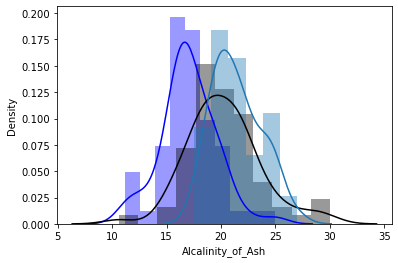

In [173]:
sns.distplot(gA,color='blue')
sns.distplot(gB,color='black')
sns.distplot(gC)

In [ ]:
#For 1 and 2 the pop mean are diff
#For 1 and 3 the mean are diff
#For 2 and 3 there is relation 